# Near bottom velocity with different BC's

Runs with slip and no-slip flags on plus drag:

|CNTDIFF_DRAG run|   Viscosity (m$^2$s$^{-1}$)  |no_slip_sides | no_slip_bottom | bottomDragQuadratic | Exploded? |
|:---------:|:----------------------------:|:------------|:-------- ----:|:-----------------:|:--------:|
| 01        |   10$^{-5}$                  | false  | false | 0.002 | No |
| 02        |   10$^{-5}$                  | false  | false | 0.001 | Yes, after 7 days |
| 03        |   10$^{-5}$                  | false  | false | 0.0   | Yes, after 1.0 day |
| 04        |   10$^{-5}$                  | false  | true | 0.0   |      |
| CNTDIFF 38|   10$^{-5}$                  | true  | true | 0.002   |  No (base case)    |



In [2]:
import cmocean as cmo
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import xarray as xr

import canyon_tools.readout_tools as rout

In [3]:
# Seaborn specs.
sns.set_context('notebook')
sns.set_style('white')

In [4]:
# grid files
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
grid = xr.open_dataset(grid_file)

# State files base case adn high diffusivity
state_base = xr.open_dataset('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/stateGlob.nc')
state_01 = xr.open_dataset('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF_DRAG/run01/stateGlob.nc')
state_02 = xr.open_dataset('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF_DRAG/run02/stateGlob.nc')
state_03 = xr.open_dataset('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF_DRAG/run03/stateGlob.nc')



In [5]:
# Coords of stations to look at BBL on shelf and slope

xs = [40,110,250,40,110,250]
ys = [245,245,245,190,190,190]

In [6]:
# Load U for upstream cross-section

Ust0 = state_base.U.isel(Xp1=xs[0])

Ust0_drag01 = state_01.U.isel(Xp1=xs[0])

Ust0_drag02 = state_02.U.isel(Xp1=xs[0])

Ust0_drag03 = state_03.U.isel(Xp1=xs[0])


## Differences after 1 day

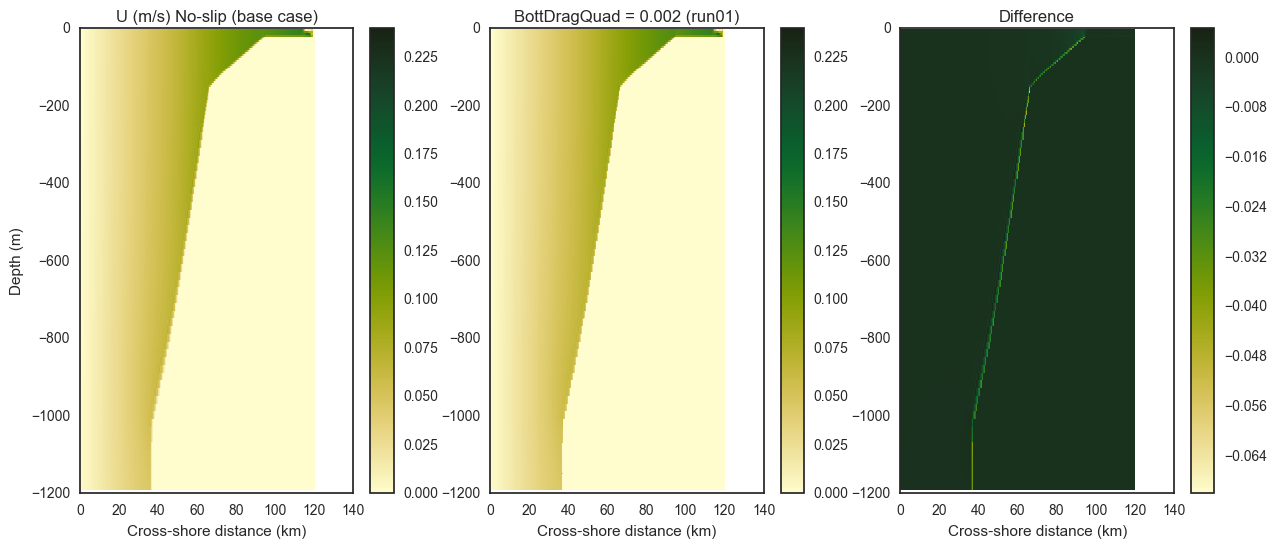

In [32]:
fig = plt.figure(figsize=(15,6))

gs = gridspec.GridSpec(1, 3,width_ratios=[1,1,1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
    


p1 = ax1.pcolor(grid.Xp1/1000,grid.RC,Ust0.isel(T=2),vmin=0.0, vmax = 0.24,cmap=cmo.cm.speed)
plt.colorbar(p1,ax=ax1)
p2 = ax2.pcolor(grid.Xp1/1000,grid.RC,Ust0_drag01.isel(T=2),vmin=0.0, vmax = 0.24,cmap=cmo.cm.speed)
plt.colorbar(p2,ax=ax2)
p3 = ax3.pcolor(grid.Xp1/1000,grid.RC,(Ust0.isel(T=2).data-Ust0_drag01.isel(T=2).data),cmap=cmo.cm.speed)
plt.colorbar(p3, ax=ax3)
        
ax1.set_title('U (m/s) No-slip (base case)')
ax1.set_ylabel('Depth (m)')
ax2.set_title('BottDragQuad = 0.002 (run01)')
ax3.set_title('Difference')
ax1.set_xlabel('Cross-shore distance (km)')
ax2.set_xlabel('Cross-shore distance (km)')
ax3.set_xlabel('Cross-shore distance (km)')

    

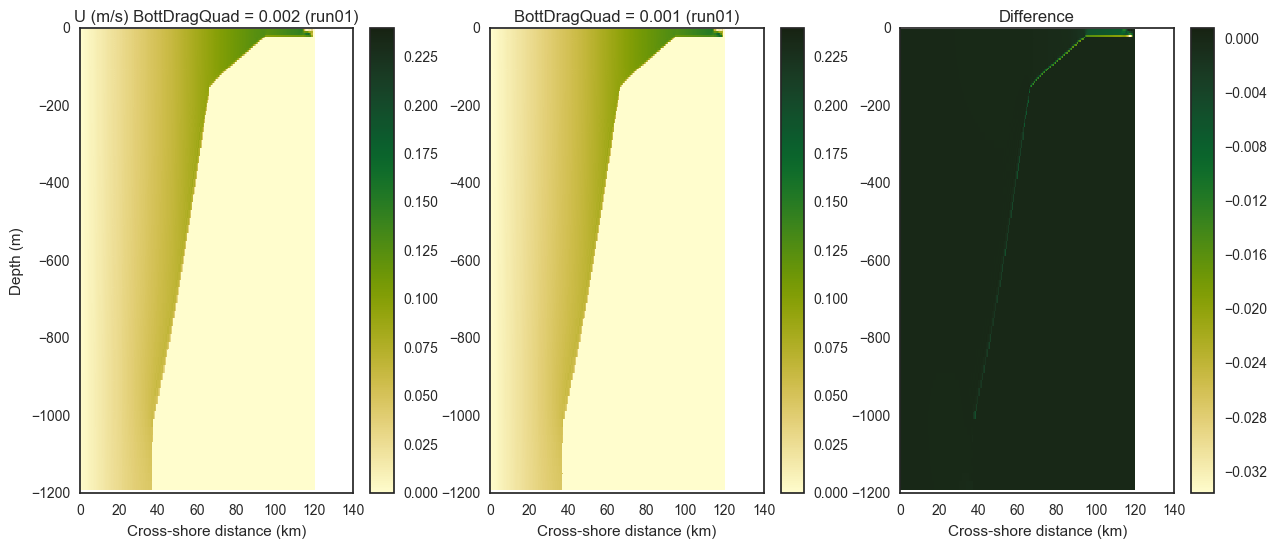

In [33]:
fig = plt.figure(figsize=(15,6))

gs = gridspec.GridSpec(1, 3,width_ratios=[1,1,1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
    


p1 = ax1.pcolor(grid.Xp1/1000,grid.RC,Ust0_drag01.isel(T=2),vmin=0.0, vmax = 0.24,cmap=cmo.cm.speed)
plt.colorbar(p1,ax=ax1)
p2 = ax2.pcolor(grid.Xp1/1000,grid.RC,Ust0_drag02.isel(T=2),vmin=0.0, vmax = 0.24,cmap=cmo.cm.speed)
plt.colorbar(p2,ax=ax2)
p3 = ax3.pcolor(grid.Xp1/1000,grid.RC,(Ust0_drag01.isel(T=2).data-Ust0_drag02.isel(T=2).data),cmap=cmo.cm.speed)
plt.colorbar(p3, ax=ax3)
        
ax1.set_title('U (m/s) BottDragQuad = 0.002 (run01)')
ax1.set_ylabel('Depth (m)')
ax2.set_title('BottDragQuad = 0.001 (run01)')
ax3.set_title('Difference')
ax1.set_xlabel('Cross-shore distance (km)')
ax2.set_xlabel('Cross-shore distance (km)')
ax3.set_xlabel('Cross-shore distance (km)')


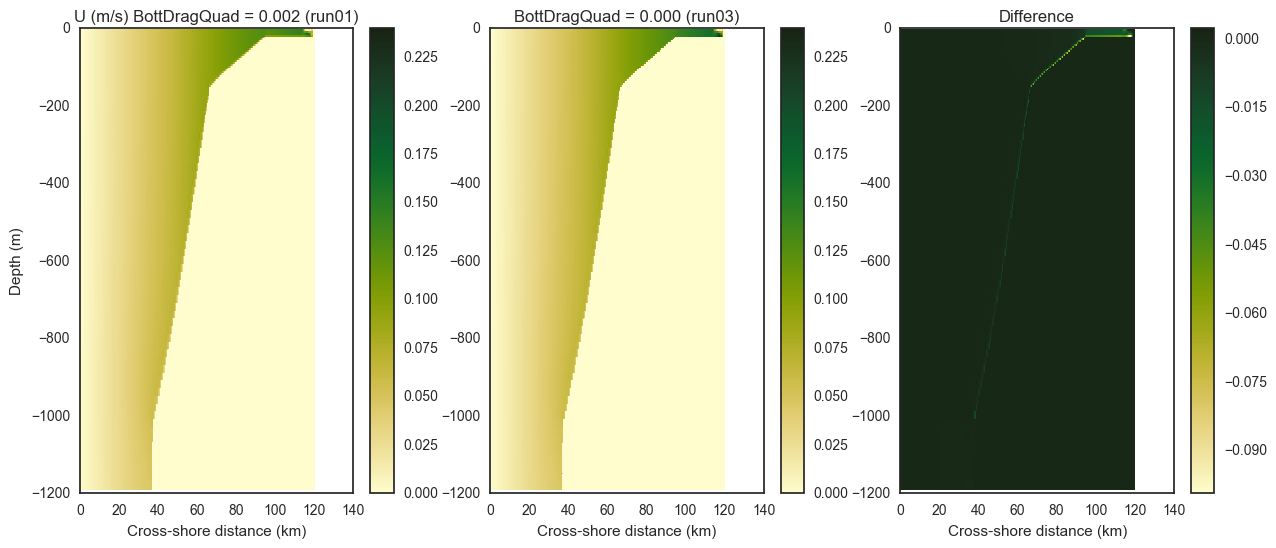

In [34]:
fig = plt.figure(figsize=(15,6))

gs = gridspec.GridSpec(1, 3,width_ratios=[1,1,1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
    


p1 = ax1.pcolor(grid.Xp1/1000,grid.RC,Ust0_drag01.isel(T=2),vmin=0.0, vmax = 0.24,cmap=cmo.cm.speed)
plt.colorbar(p1,ax=ax1)
p2 = ax2.pcolor(grid.Xp1/1000,grid.RC,Ust0_drag03.isel(T=2),vmin=0.0, vmax = 0.24,cmap=cmo.cm.speed)
plt.colorbar(p2,ax=ax2)
p3 = ax3.pcolor(grid.Xp1/1000,grid.RC,(Ust0_drag01.isel(T=2).data-Ust0_drag03.isel(T=2).data),cmap=cmo.cm.speed)
plt.colorbar(p3, ax=ax3)
        
ax1.set_title('U (m/s) BottDragQuad = 0.002 (run01)')
ax1.set_ylabel('Depth (m)')
ax2.set_title('BottDragQuad = 0.000 (run03)')
ax3.set_title('Difference')
ax1.set_xlabel('Cross-shore distance (km)')
ax2.set_xlabel('Cross-shore distance (km)')
ax3.set_xlabel('Cross-shore distance (km)')


## Differences after 7 days

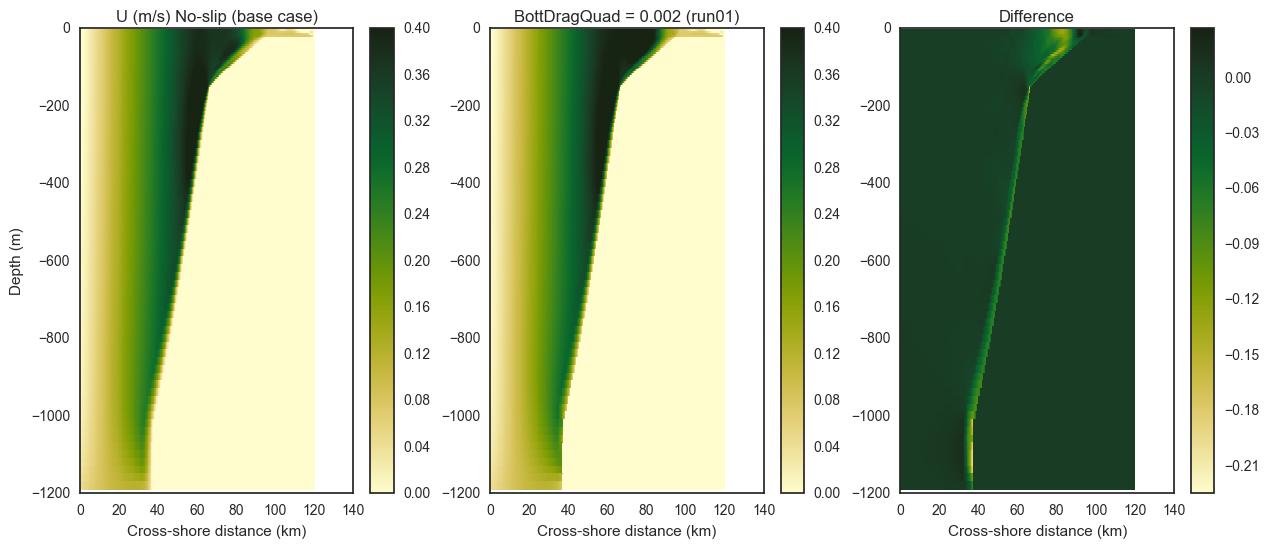

In [35]:
fig = plt.figure(figsize=(15,6))

gs = gridspec.GridSpec(1, 3,width_ratios=[1,1,1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
    


p1 = ax1.pcolor(grid.Xp1/1000,grid.RC,Ust0.isel(T=14),vmin=0.0, vmax = 0.4,cmap=cmo.cm.speed)
plt.colorbar(p1,ax=ax1)
p2 = ax2.pcolor(grid.Xp1/1000,grid.RC,Ust0_drag01.isel(T=14),vmin=0.0, vmax = 0.4,cmap=cmo.cm.speed)
plt.colorbar(p2,ax=ax2)
p3 = ax3.pcolor(grid.Xp1/1000,grid.RC,(Ust0.isel(T=14).data-Ust0_drag01.isel(T=14).data),cmap=cmo.cm.speed)
plt.colorbar(p3, ax=ax3)
        
ax1.set_title('U (m/s) No-slip (base case)')
ax1.set_ylabel('Depth (m)')
ax2.set_title('BottDragQuad = 0.002 (run01)')
ax3.set_title('Difference')
ax1.set_xlabel('Cross-shore distance (km)')
ax2.set_xlabel('Cross-shore distance (km)')
ax3.set_xlabel('Cross-shore distance (km)')


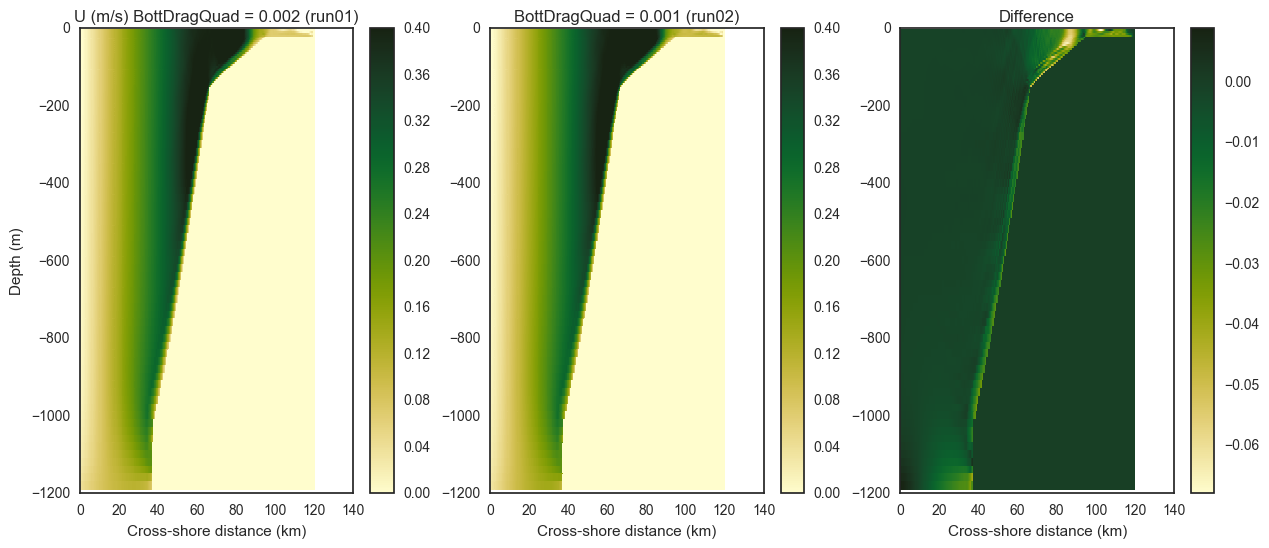

In [36]:
fig = plt.figure(figsize=(15,6))

gs = gridspec.GridSpec(1, 3,width_ratios=[1,1,1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
    


p1 = ax1.pcolor(grid.Xp1/1000,grid.RC,Ust0_drag01.isel(T=14),vmin=0.0, vmax = 0.4,cmap=cmo.cm.speed)
plt.colorbar(p1,ax=ax1)
p2 = ax2.pcolor(grid.Xp1/1000,grid.RC,Ust0_drag02.isel(T=14),vmin=0.0, vmax = 0.4,cmap=cmo.cm.speed)
plt.colorbar(p2,ax=ax2)
p3 = ax3.pcolor(grid.Xp1/1000,grid.RC,(Ust0_drag01.isel(T=14).data-Ust0_drag02.isel(T=14).data),cmap=cmo.cm.speed)
plt.colorbar(p3, ax=ax3)
        
ax1.set_title('U (m/s) BottDragQuad = 0.002 (run01)')
ax1.set_ylabel('Depth (m)')
ax2.set_title('BottDragQuad = 0.001 (run02)')
ax3.set_title('Difference')
ax1.set_xlabel('Cross-shore distance (km)')
ax2.set_xlabel('Cross-shore distance (km)')
ax3.set_xlabel('Cross-shore distance (km)')
